In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [74]:
advertising = pd.read_csv('../../Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


(0.0, 28.27)

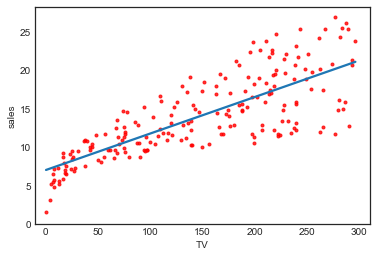

In [75]:
sns.regplot(advertising.TV,advertising.sales,order=1,ci=None,scatter_kws={'color':'r','s':9})
plt.xlim(-10,310)
plt.ylim(ymin=0)

In [76]:
advertising['TV'].values.reshape(-1,1)

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

## Split train and test

In [77]:
from sklearn.model_selection import train_test_split
def train_test_spliting(df):
    train_set,test_set=train_test_split(df,test_size=0.2,random_state=42)
    return train_set,test_set

In [78]:
train_set,test_set=train_test_spliting(advertising)
print(train_set.info())
print(test_set.info())
X_train,y_train,X_test,y_test=train_set['TV'].values.reshape(-1,1),train_set['sales'],test_set['TV'].values.reshape(-1,1),test_set['sales']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         160 non-null    float64
 1   radio      160 non-null    float64
 2   newspaper  160 non-null    float64
 3   sales      160 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         40 non-null     float64
 1   radio      40 non-null     float64
 2   newspaper  40 non-null     float64
 3   sales      40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB
None


### No Standard scaler

In [79]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg)
print(lin_reg.intercept_)
print(lin_reg.coef_)
lin_reg.score(X_train,y_train)
y_pred=lin_reg.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

LinearRegression()
7.119638430592953
[0.04652973]

RMSE:  3.194


### Standard scaling using preprocessing

In [80]:
regr = LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales
X_train,X_test=X[:-20],X[-20:]
y_train,y_test=y[:-20],y[-20:]

regr.fit(X_train,y_train)
print(regr)
print(regr.intercept_)
print(regr.coef_)
regr.score(X_train,y_train)
y_pred=regr.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

LinearRegression()
14.060244872839633
[0.0468933]

RMSE:  3.511


### Standard scaling using sklearn's libraries and fucntions

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [90]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = num_pipeline.fit_transform(X_train)
lm=LinearRegression()
lm.fit(X_train_tr,y_train)
print(lm.intercept_)
print(lm.coef_)
lm.score(X_train_tr,y_train)
y_pred=lm.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

14.100000000000001
[3.76409388 2.81403482]

RMSE:  671.83


## Multi Regression

In [71]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [91]:
train_set,test_set=train_test_spliting(advertising)
print(train_set.info())
print(test_set.info())
X_train,y_train,X_test,y_test=train_set[['TV','radio']],train_set['sales'],test_set[['TV','radio']],test_set['sales']


<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 79 to 102
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         160 non-null    float64
 1   radio      160 non-null    float64
 2   newspaper  160 non-null    float64
 3   sales      160 non-null    float64
dtypes: float64(4)
memory usage: 6.2 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 95 to 76
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         40 non-null     float64
 1   radio      40 non-null     float64
 2   newspaper  40 non-null     float64
 3   sales      40 non-null     float64
dtypes: float64(4)
memory usage: 1.6 KB
None


In [92]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [93]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)
lin_reg.score(X_train,y_train)
y_pred=lin_reg.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

3.028255250783305
[0.0447283  0.19066726]

RMSE:  1.771


In [94]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

X_train_tr = num_pipeline.fit_transform(X_train)
lm=LinearRegression()
lm.fit(X_train_tr,y_train)
print(lm.intercept_)
print(lm.coef_)
lm.score(X_train_tr,y_train)
y_pred=lm.predict(X_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print("\nRMSE: ", rmse)

14.100000000000001
[3.76409388 2.81403482]

RMSE:  671.83
